In [6]:
import numpy as np
import os
current_directory = os.getcwd()
print(current_directory)

os.chdir('/home/jovyan/home/wakefinder/src/scripts')
import load as ld
import phys_quant as pq
import plots as pl
import rotations as rot
import regioncut as rc
from importlib import reload
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

/home/jovyan/home/wakefinder/src/scripts


## Chequeo de rotacion y carga datos

In [ ]:
# run if checking data files is needed
# import os
# data_script_dir = './'
# data_script_name = 'data_prep.py'
# path = os.path.join(data_script_dir, data_script_name)
# %run $path

In [7]:

#lee los dataset ya verificada la rotacion
mw = ld.txt("mw_rot")
mw_lmc = ld.txt("mw_lmc_rot")
lmc = ld.txt("lmc_rot")


/home/jovyan/home/wakefinder/src/scripts
/home/jovyan/home/wakefinder/src/scripts
/home/jovyan/home/wakefinder/src/scripts


In [8]:
# #Revisar que la operacion sea correcta
rel_lmc = pq.get_rot_orbit(lmc)

lmc shape: (151, 3)
lmc max: 52.08886337735412
shape orb: (151, 6)


In [9]:
reload(pl)
pl.surface_plot(rel_lmc, n_vector)

NameError: name 'n_vector' is not defined

In [ ]:
# #Pruebas
# test_mw = np.random.rand(10,8)
# test_mw_lmc = np.random.rand(10,8)

In [ ]:
# test = pq.add_more_quant(test_mw, test_mw_lmc)

In [ ]:
#Agrega las cantidades fisicas al array de datos
# mw_halo, mw_lmc_halo = pq.add_more_quant(mw, mw_lmc)
# print("the shape of mw_halo is:", mw_halo.shape)
# print("the shape of mw_lmc_halo is:", mw_lmc_halo.shape)

In [ ]:
# #graficas orbitas LMC
pl.LMC_plot(rel_lmc, "xy")
pl.LMC_plot(rel_lmc, "xz")
pl.LMC_plot(rel_lmc, "yz")


/srv/conda/envs/notebook/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [598]:
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'xy')
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'xz')
pl.trajectory_LMC(rel_lmc,rel_lmc,20, 'yz')

(1000000,)
(1000000,)


/home/jovyan/home/wakefinder/src/scripts/plots.py:52: RuntimeWarning: divide by zero encountered in log10
  np.log10(hist_r_L_rot.T),


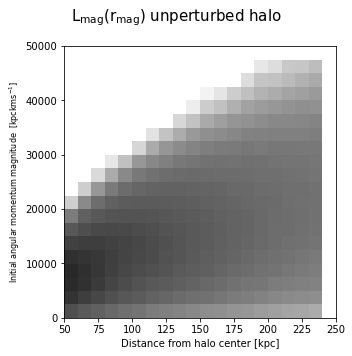

/home/jovyan/home/wakefinder/src/scripts/plots.py:110: RuntimeWarning: divide by zero encountered in log10
  np.log10(hist.T),


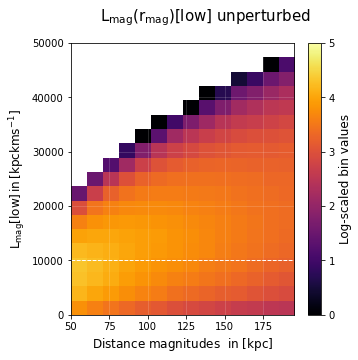

In [10]:
#Grafica de la magnitud del momento angular vs radio
reload(pl)
pl.hist_r_l(mw)


bins_r = np.arange(50, 200, 10)
bins_L = np.arange(9, 50000, 2500)
hist1 = pl.calculate_histogram(mw, bins_r, bins_L)
pl.plot_histogram(hist1, "mw")



# hist2 = pl.calculate_histogram(mw_lmc, bins_r, bins_L)
# pl.plot_histogram(hist2, "mw_lmc")



In [ ]:
# pl.hist_proj_r_l(mw,'yz')

# Primera seleccion

the shape of pos below threshold (355681,)
the shape of ids below threshold (355681,)
first 10 ids [1.04398658e+08 8.77219950e+07 8.50995300e+07 6.28193870e+07
 3.81598140e+07 2.05286200e+07 6.26671980e+07 6.39184520e+07
 4.88569010e+07 9.32216300e+06]
the shape of mw_sel1 (355681, 16)


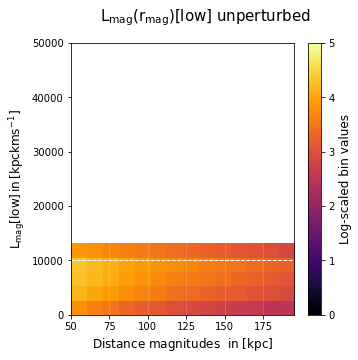

/home/jovyan/home/wakefinder/src/scripts/plots.py:151: RuntimeWarning: divide by zero encountered in log10
  np.log10(hist_r_L.T),


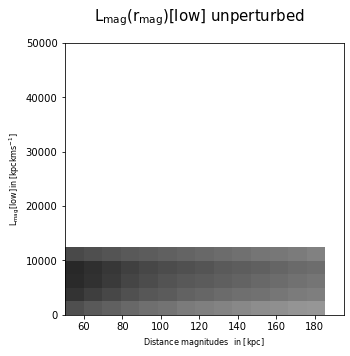

the shape of mw_sel1 (355681, 16)
the shape of common_ids (355681,)
first 10 common ids [1.04398658e+08 8.77219950e+07 8.50995300e+07 6.28193870e+07
 3.81598140e+07 2.05286200e+07 6.26671980e+07 6.39184520e+07
 4.88569010e+07 9.32216300e+06]
all ids are in the perturbed halo
(355681,)
(355681,)


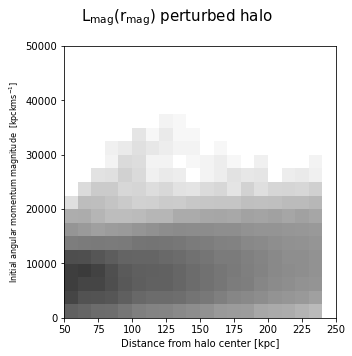

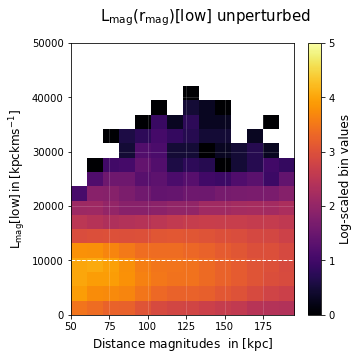

In [11]:
#selecciona las particulas que estan en el rango de radio y momento angular
# low_L, ids_nopert = rc.threshold_L(mw_lmc_halo,5000,10000)
low_L, ids_nopert = rc.threshold_L(mw,0000,11000)
mw_sel1 = np.copy(mw[low_L])
# mw_sel1 = np.copy(mw_lmc_halo[low_L])

print("the shape of mw_sel1", mw_sel1.shape)
reload(pl)
mw_sel1_hist = pl.calculate_histogram(mw_sel1, bins_r, bins_L)
pl.plot_histogram(mw_sel1_hist, "mw_sel1")


pl.hist_L_r_low(mw_sel1[:,8], mw_sel1[:,10],'mw_sel1')
print("the shape of mw_sel1", mw_sel1.shape)
mw_sel1 = np.copy(mw[low_L])
# mw_sel1 = np.copy(mw_lmc_halo[low_L])
ids_perthalo, common_ids = rc.get_ids(mw, mw_lmc, ids_nopert)
# ids_perthalo, common_ids = rc.get_ids(mw_lmc_halo, mw_halo, ids_nopert)
# check if all selected particles are in the perturbed halo
# rc.test_ids(common_ids, mw_halo)

rc.test_ids(common_ids, mw_lmc)
#select particles in the perturbed halo
mw_lmc_sel1 = np.copy(mw_lmc[ids_perthalo])
# mw_lmc_sel1 = np.copy(mw_halo[ids_perthalo])

reload(pl)
pl.hist_r_l(mw_lmc_sel1,True,'mw_lmc_sel1')
mw_lmc_sel1_hist = pl.calculate_histogram(mw_lmc_sel1, bins_r, bins_L)
pl.plot_histogram(mw_lmc_sel1_hist, "mw_lmc_sel1")

# Segunda seleccion

the shape of line_1 (355681,)
the shape of line_2 (355681,)
the shape of select2_part (783,)


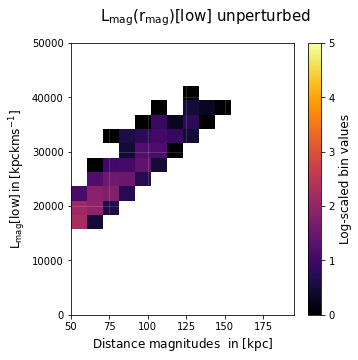

(783,)
(783,)


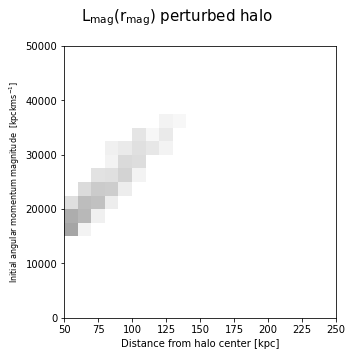

In [24]:
# sel2_part = rc.sel2(mw_lmc_sel1,220,50,13000,20000)
sel2_part = rc.sel2(mw_lmc_sel1,220,50,15000,30000)
sel2_part_hist = pl.calculate_histogram(mw_lmc_sel1[sel2_part], bins_r, bins_L)
pl.plot_histogram(sel2_part_hist, "sel2_part")
pl.hist_r_l(mw_lmc_sel1[sel2_part],True,'mw_lmc_sel2')
wake_particles_pert, wake_particles_no_pert = rc.selected_ids(mw_lmc_sel1, sel2_part, mw, mw_lmc)

# Graficas

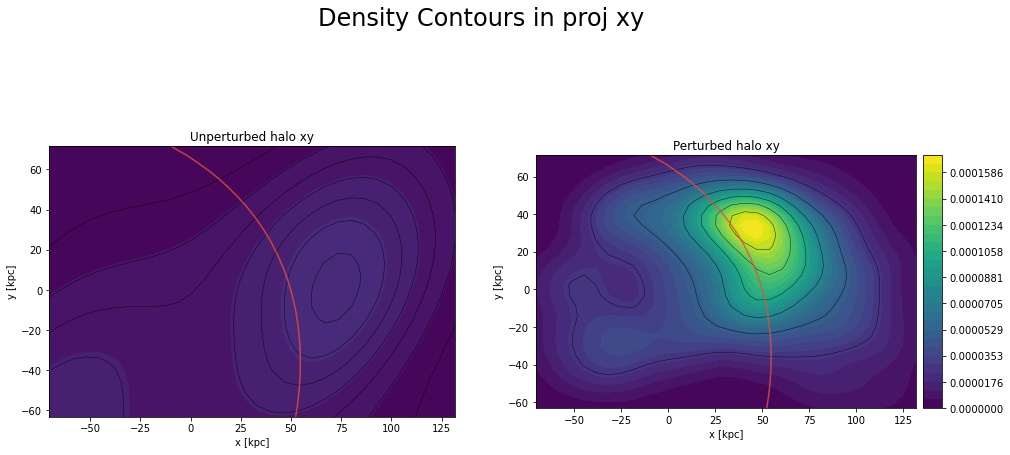

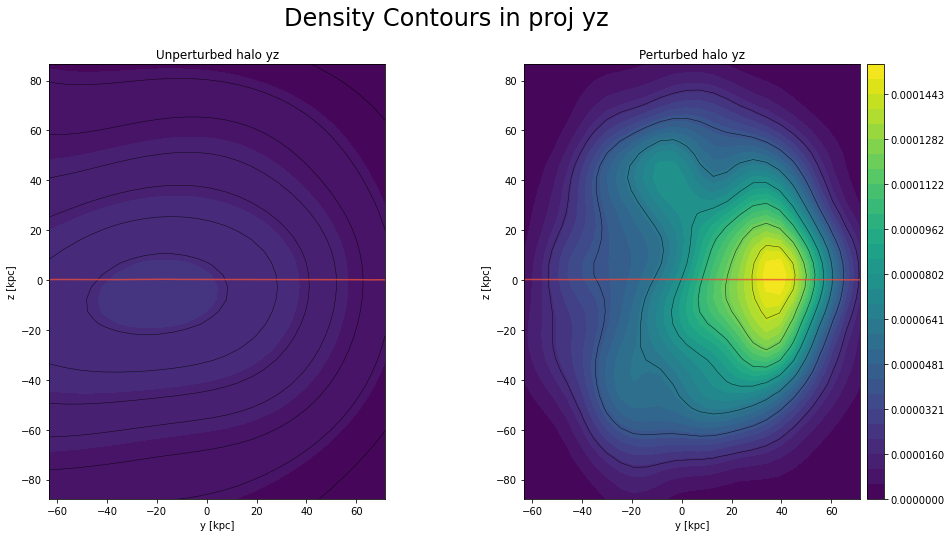

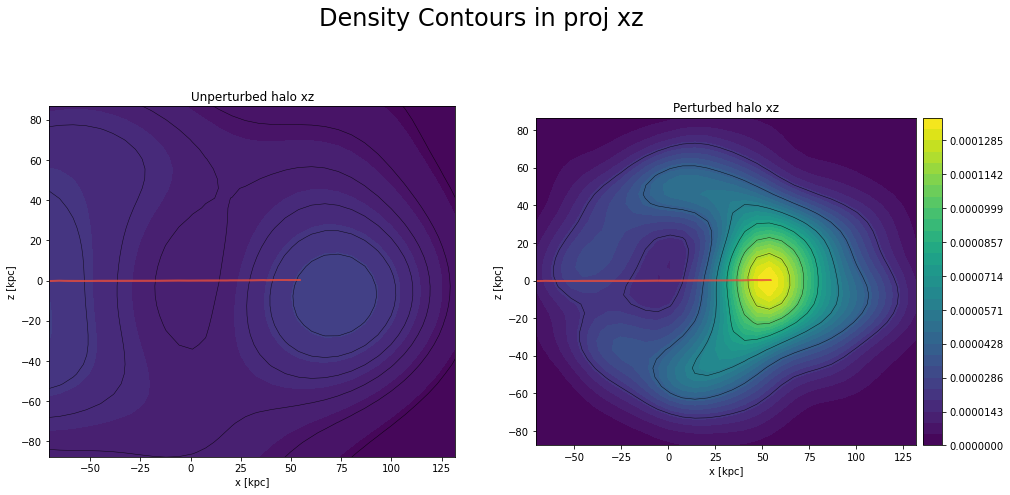

In [23]:

pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'xy')
pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'yz')
pl.comparison_density_contour_plt(wake_particles_no_pert, wake_particles_pert, rel_lmc, 'xz')

Mean angle:  -0.32077045609748384
Standard deviation of angles:  1.857531246489186
Circular variance:  0.7749261946055204
Divergence:  185.12212196690763
Skewness of unperturbed halo inx direction: 4.030353892601987
Skewness of unperturbed halo in y direction: 3.557043313281584
Skewness of perturbed halo in x direction: 0.9675172342316543
Skewness of perturbed halo in y direction: 1.2481458095019498
Mean angle:  1.507597754971442
Standard deviation of angles:  0.8307988235883347
Circular variance:  0.10729940802507332
Divergence:  [ 2.85306270e+02  1.09311270e+01 -6.17376896e+01  5.37307879e+01
  1.33026656e+01  3.06469697e+01 -6.20239540e+01 -8.59055855e+00
  3.31294882e+01 -1.07143998e+01 -4.19467294e+01 -3.83280767e+02
  3.86605844e+01  3.91019580e+02 -1.55112563e+01 -2.62988340e+01
  1.47092657e+01  3.01963509e+00 -1.47523003e+01 -8.91412515e+01
  9.64963097e+01  5.07193585e+01 -9.44475446e+01 -3.28460346e+02
  8.66473592e+00  3.06817606e+02 -4.23229520e+01  5.75978386e+01
  5.7946

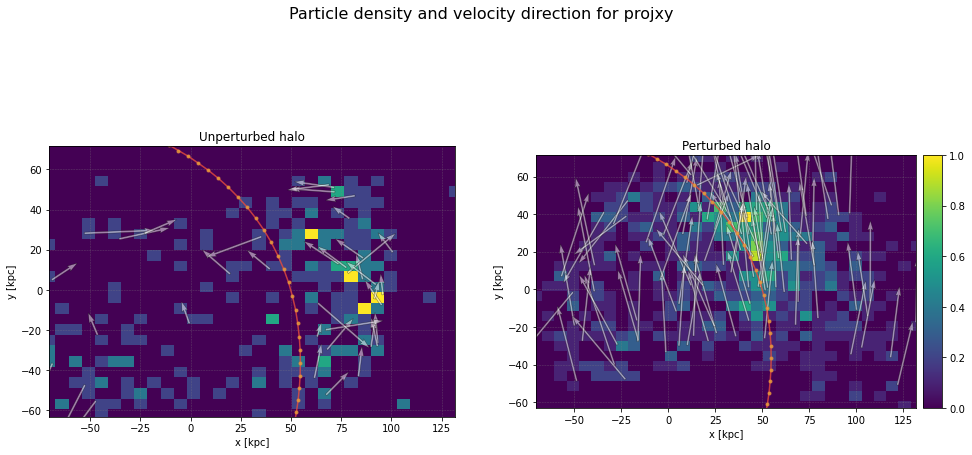

Mean angle:  -0.031938391109787634
Standard deviation of angles:  2.1331080468991788
Circular variance:  0.8339061450946854
Divergence:  136.88388928980567
Skewness of unperturbed halo iny direction: 3.084480699932053
Skewness of unperturbed halo in z direction: 3.752086847173
Skewness of perturbed halo in y direction: 1.4664479448407945
Skewness of perturbed halo in z direction: 0.9168106097024321
Mean angle:  0.01393266148714333
Standard deviation of angles:  0.5801035897746235
Circular variance:  0.11008019379301126
Divergence:  [-2.93937794e+01 -7.21223808e+01  4.96767175e+01  1.06662259e+02
 -4.02753057e+01  5.03371408e+01 -1.52437097e+01 -4.38637162e+00
  6.51704438e+01 -7.76462764e+01 -4.83173039e+01 -1.99873653e+02
 -1.78217716e+01  2.35775770e+02  8.57332234e+00 -7.34742695e+01
  1.61263621e+01 -3.39239764e+01  1.37946297e+01  4.75032538e+01
 -3.71810962e+01  3.08829423e+01  2.22314211e+01 -3.51010068e+02
 -7.99688096e+00  3.39478962e+02 -5.90109819e+01  4.68461170e+01
  1.868

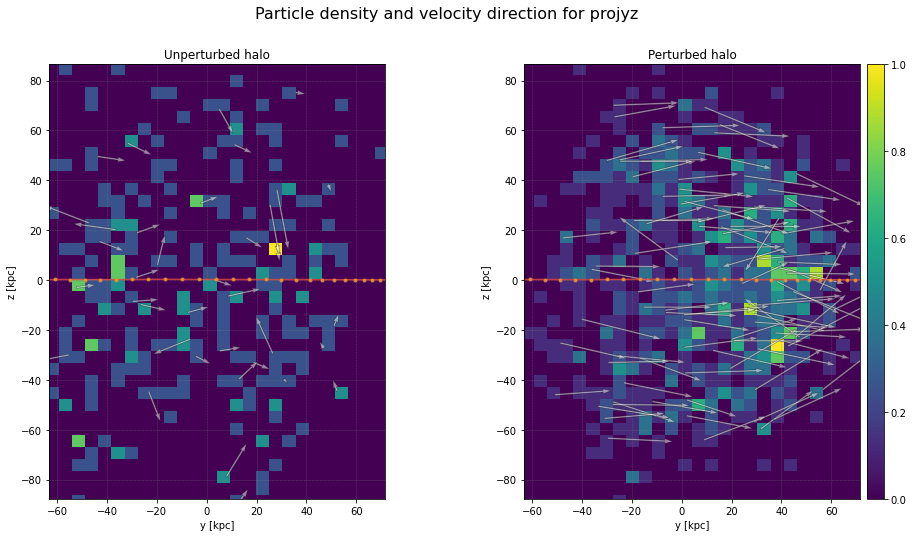

Mean angle:  -0.03190916801624685
Standard deviation of angles:  2.0715647649442044
Circular variance:  0.8016716454911341
Divergence:  26.575884883517645
Skewness of unperturbed halo inx direction: 3.275856430069457
Skewness of unperturbed halo in z direction: 3.6195644473639677
Skewness of perturbed halo in x direction: 1.512778270020857
Skewness of perturbed halo in z direction: 1.2398632819521316
Mean angle:  -0.06952155473035045
Standard deviation of angles:  2.11892899356266
Circular variance:  0.7326067718101468
Divergence:  [ 216.8664091   -18.60104375  -32.56204248  143.45316462    4.48334066
   70.50614484  -18.65877906  -11.1155742   132.42593818 -125.0987191
 -157.83549543    5.34679568  -23.81921427   19.6067723    83.58685847
  -38.83656946   -2.3689237   -34.96025618  -11.92620721  -28.17642965
   35.37376187   42.69395507  -69.30462503  -71.49737069   15.99155815
   71.52206557  -73.91846344  167.77080786   75.47014852    5.64406171
  -73.15215393 -129.47780003   75.210

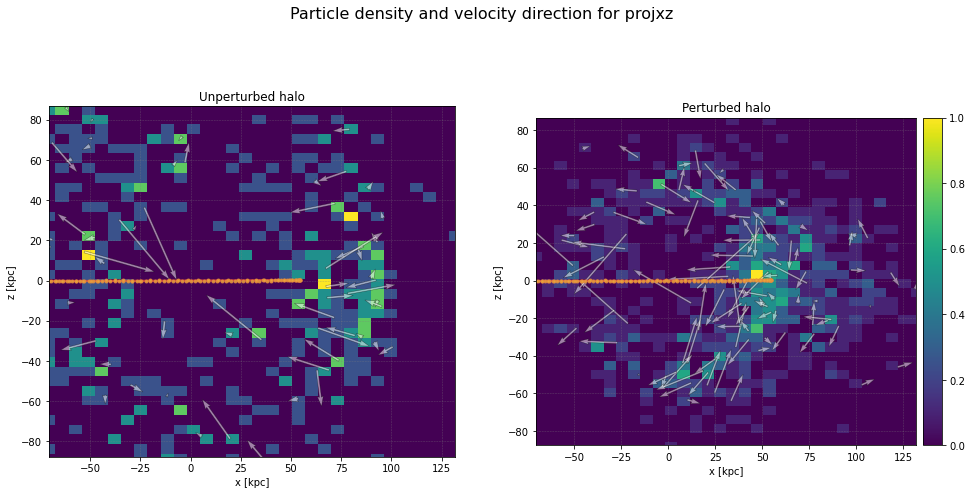

In [25]:
reload(pl)
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'xy',8,1500,0.005)
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'yz',8,1500,0.005)
# Hacer zoom 
pl.comparison_hist_orbit_plt(wake_particles_no_pert, wake_particles_pert,rel_lmc, 'xz',8,1500,0.005)

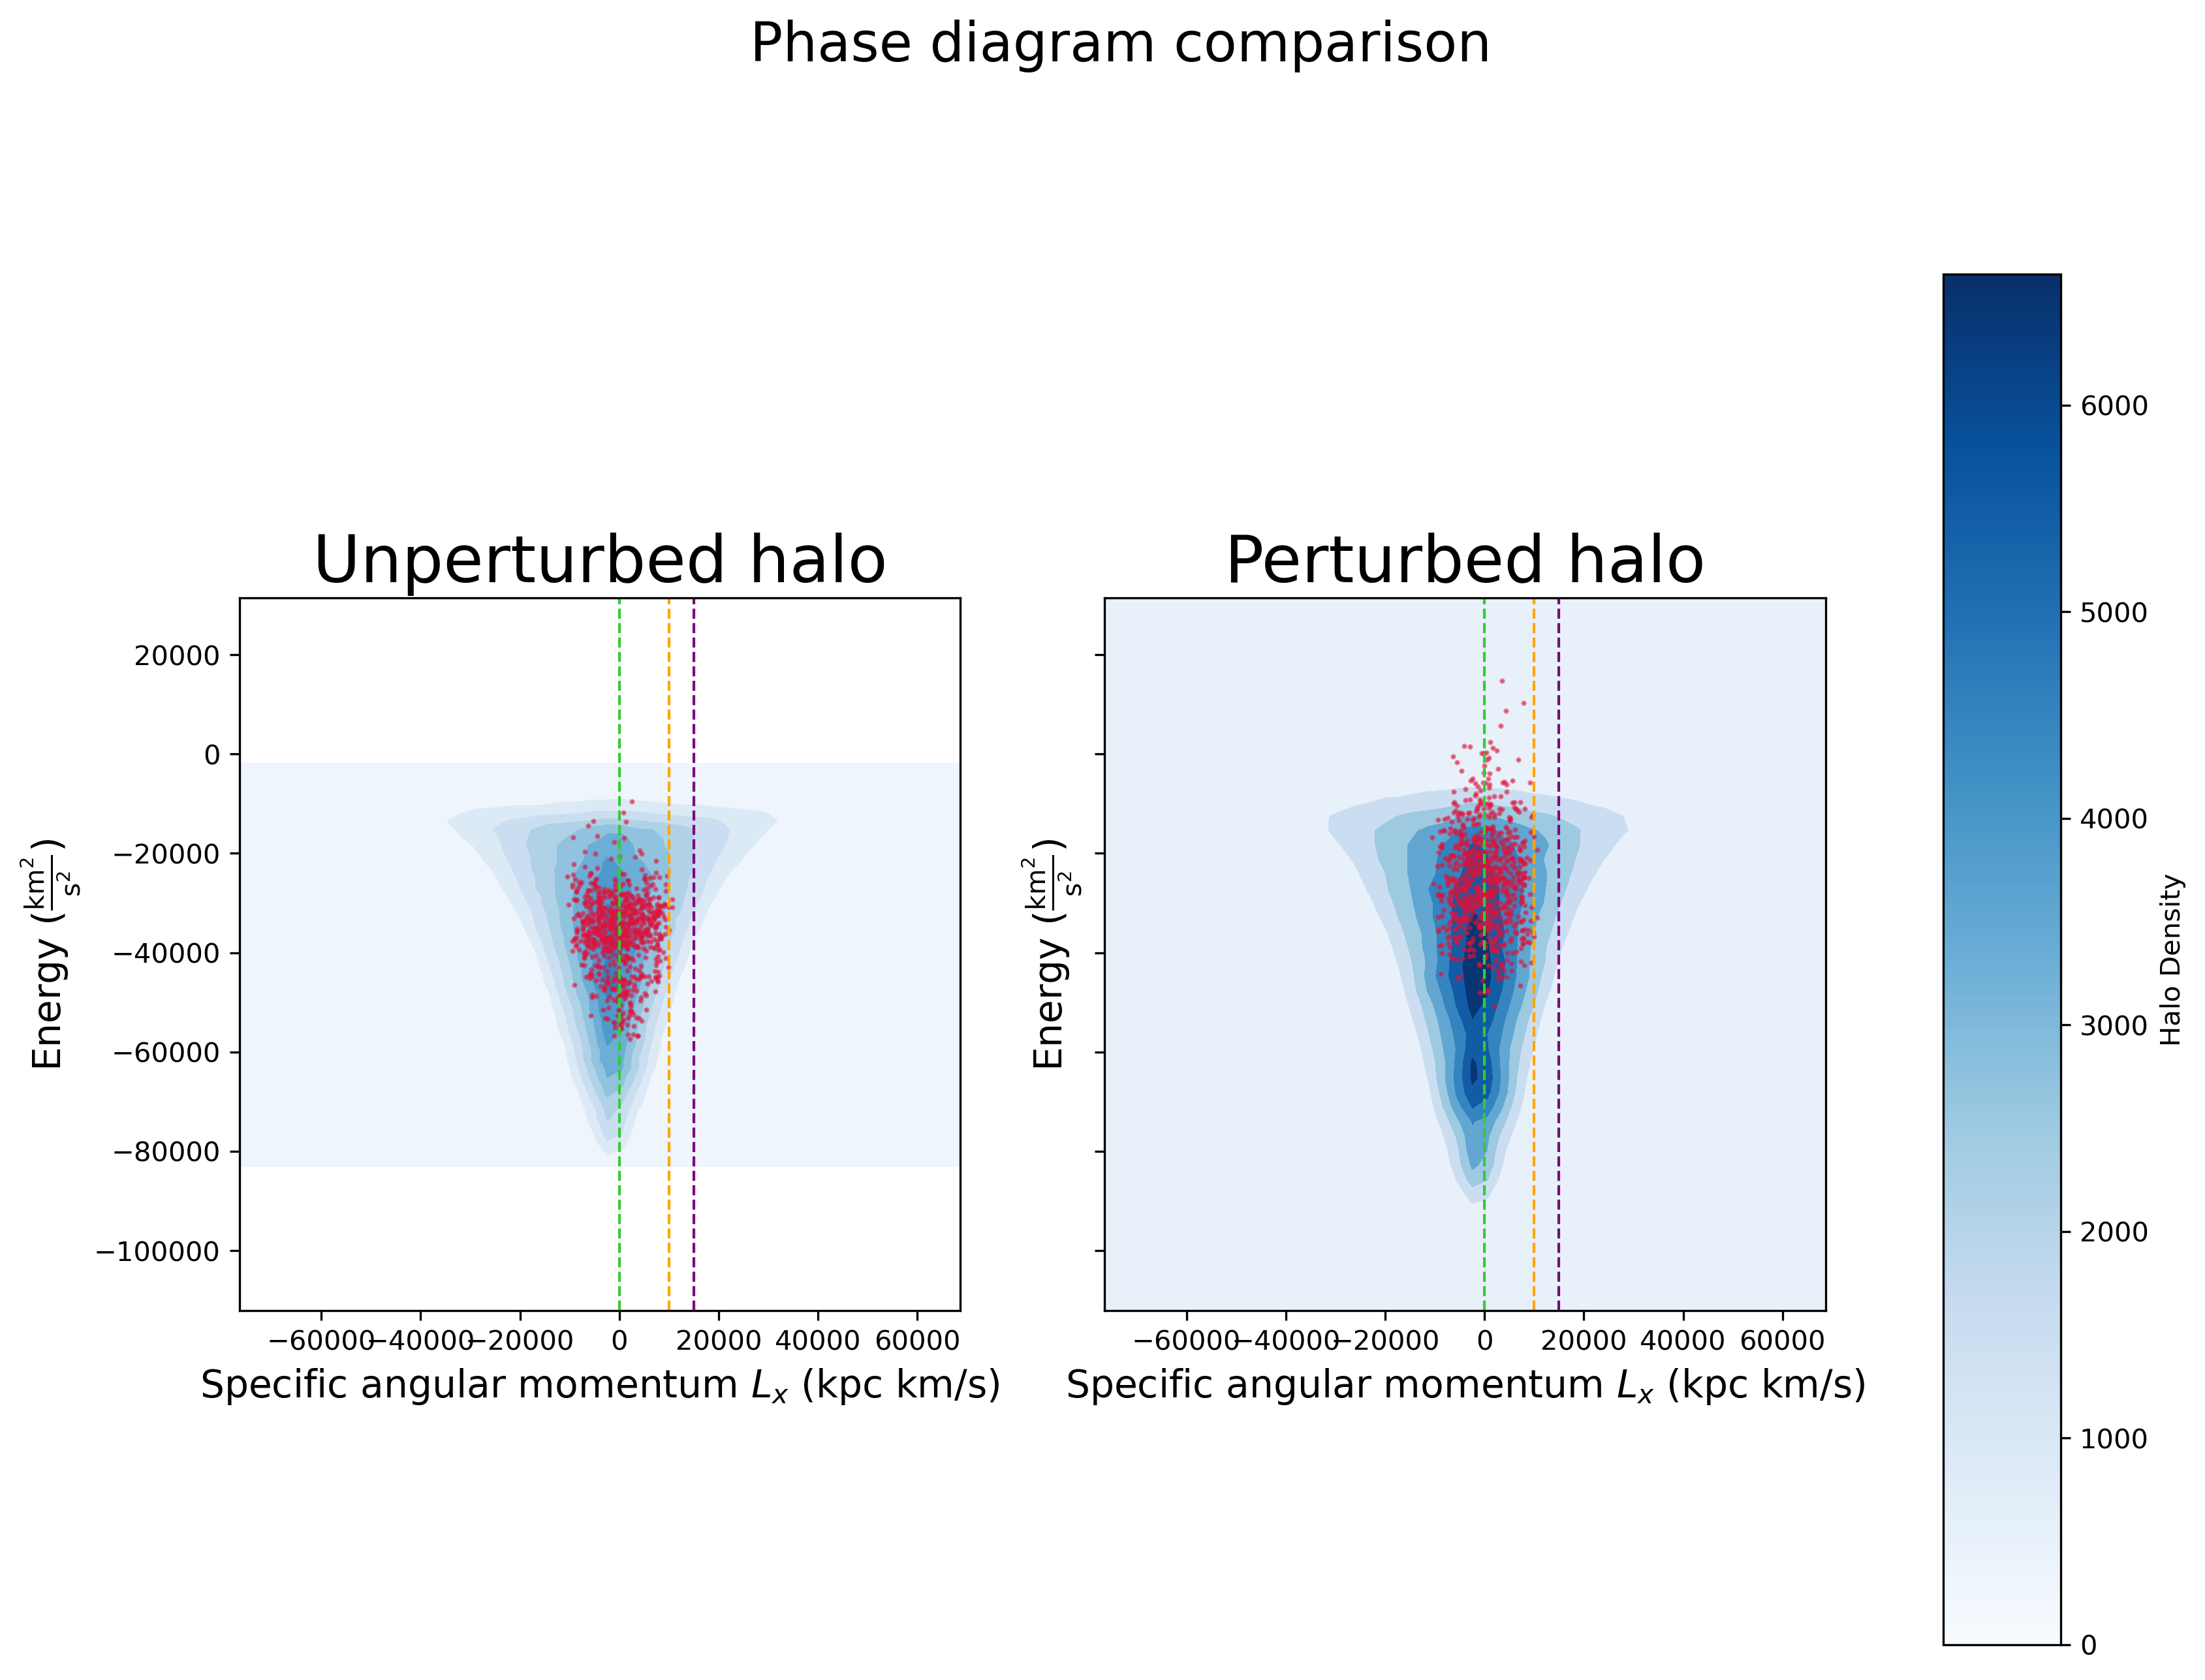

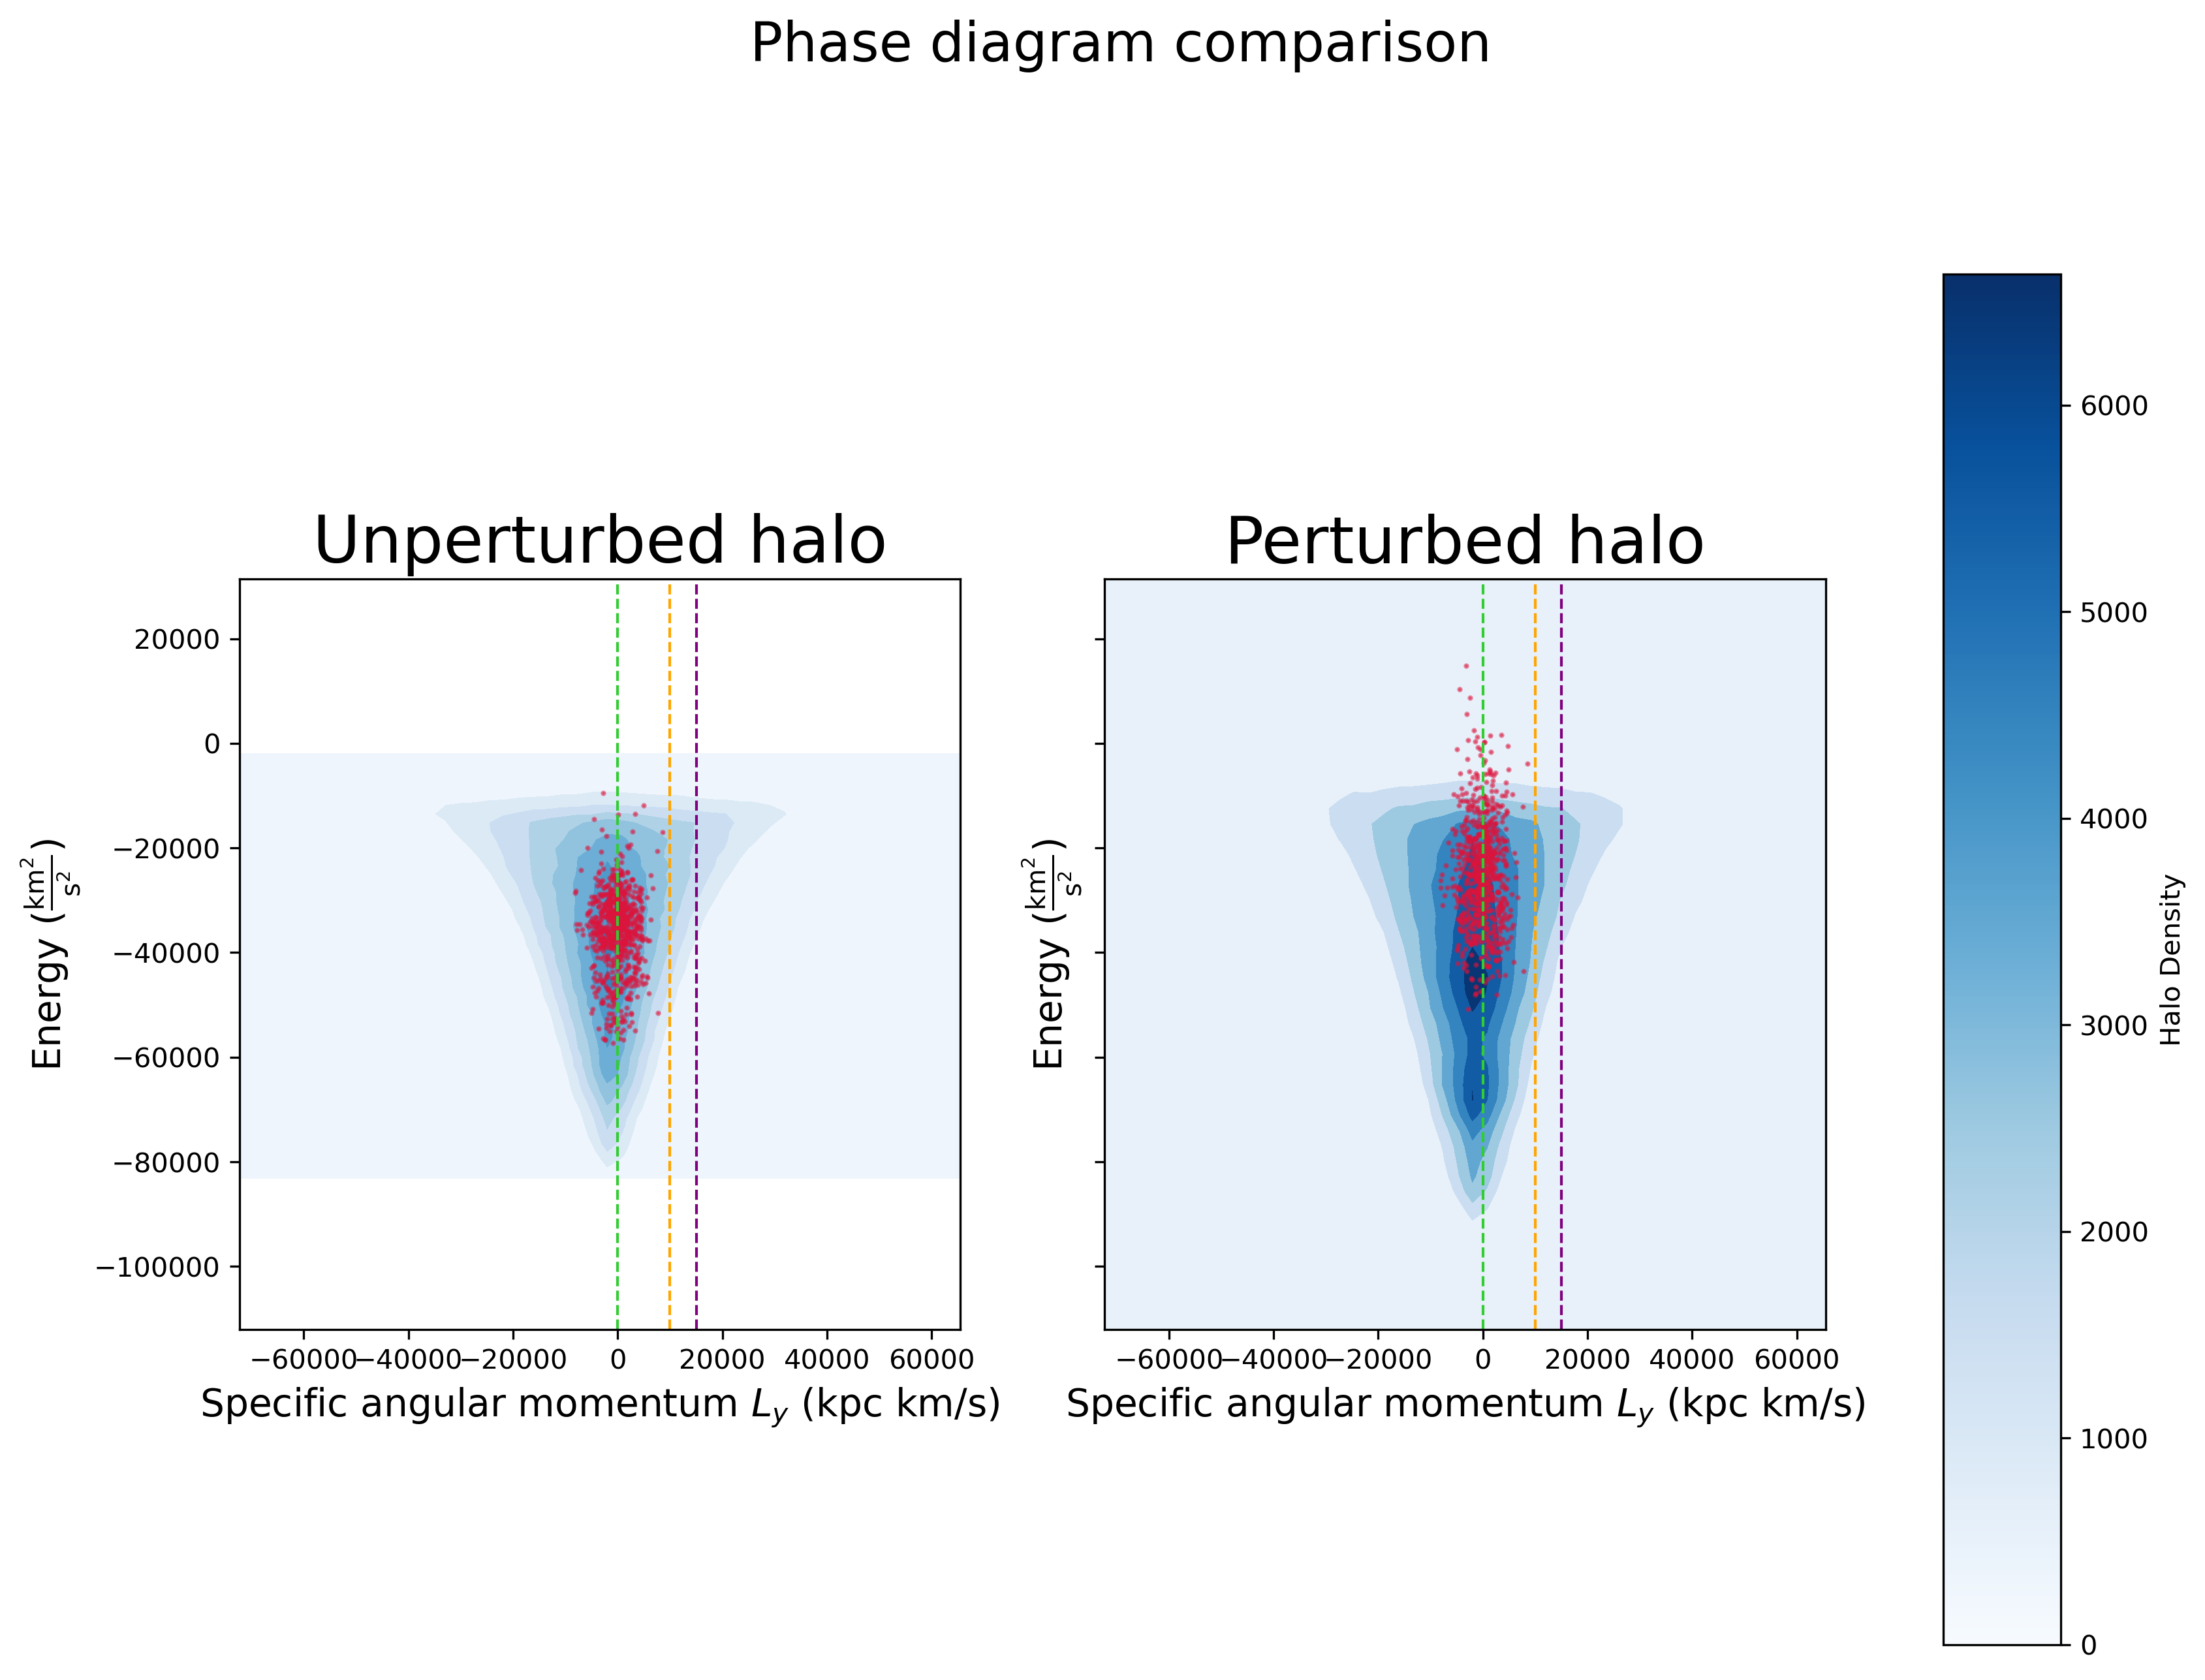

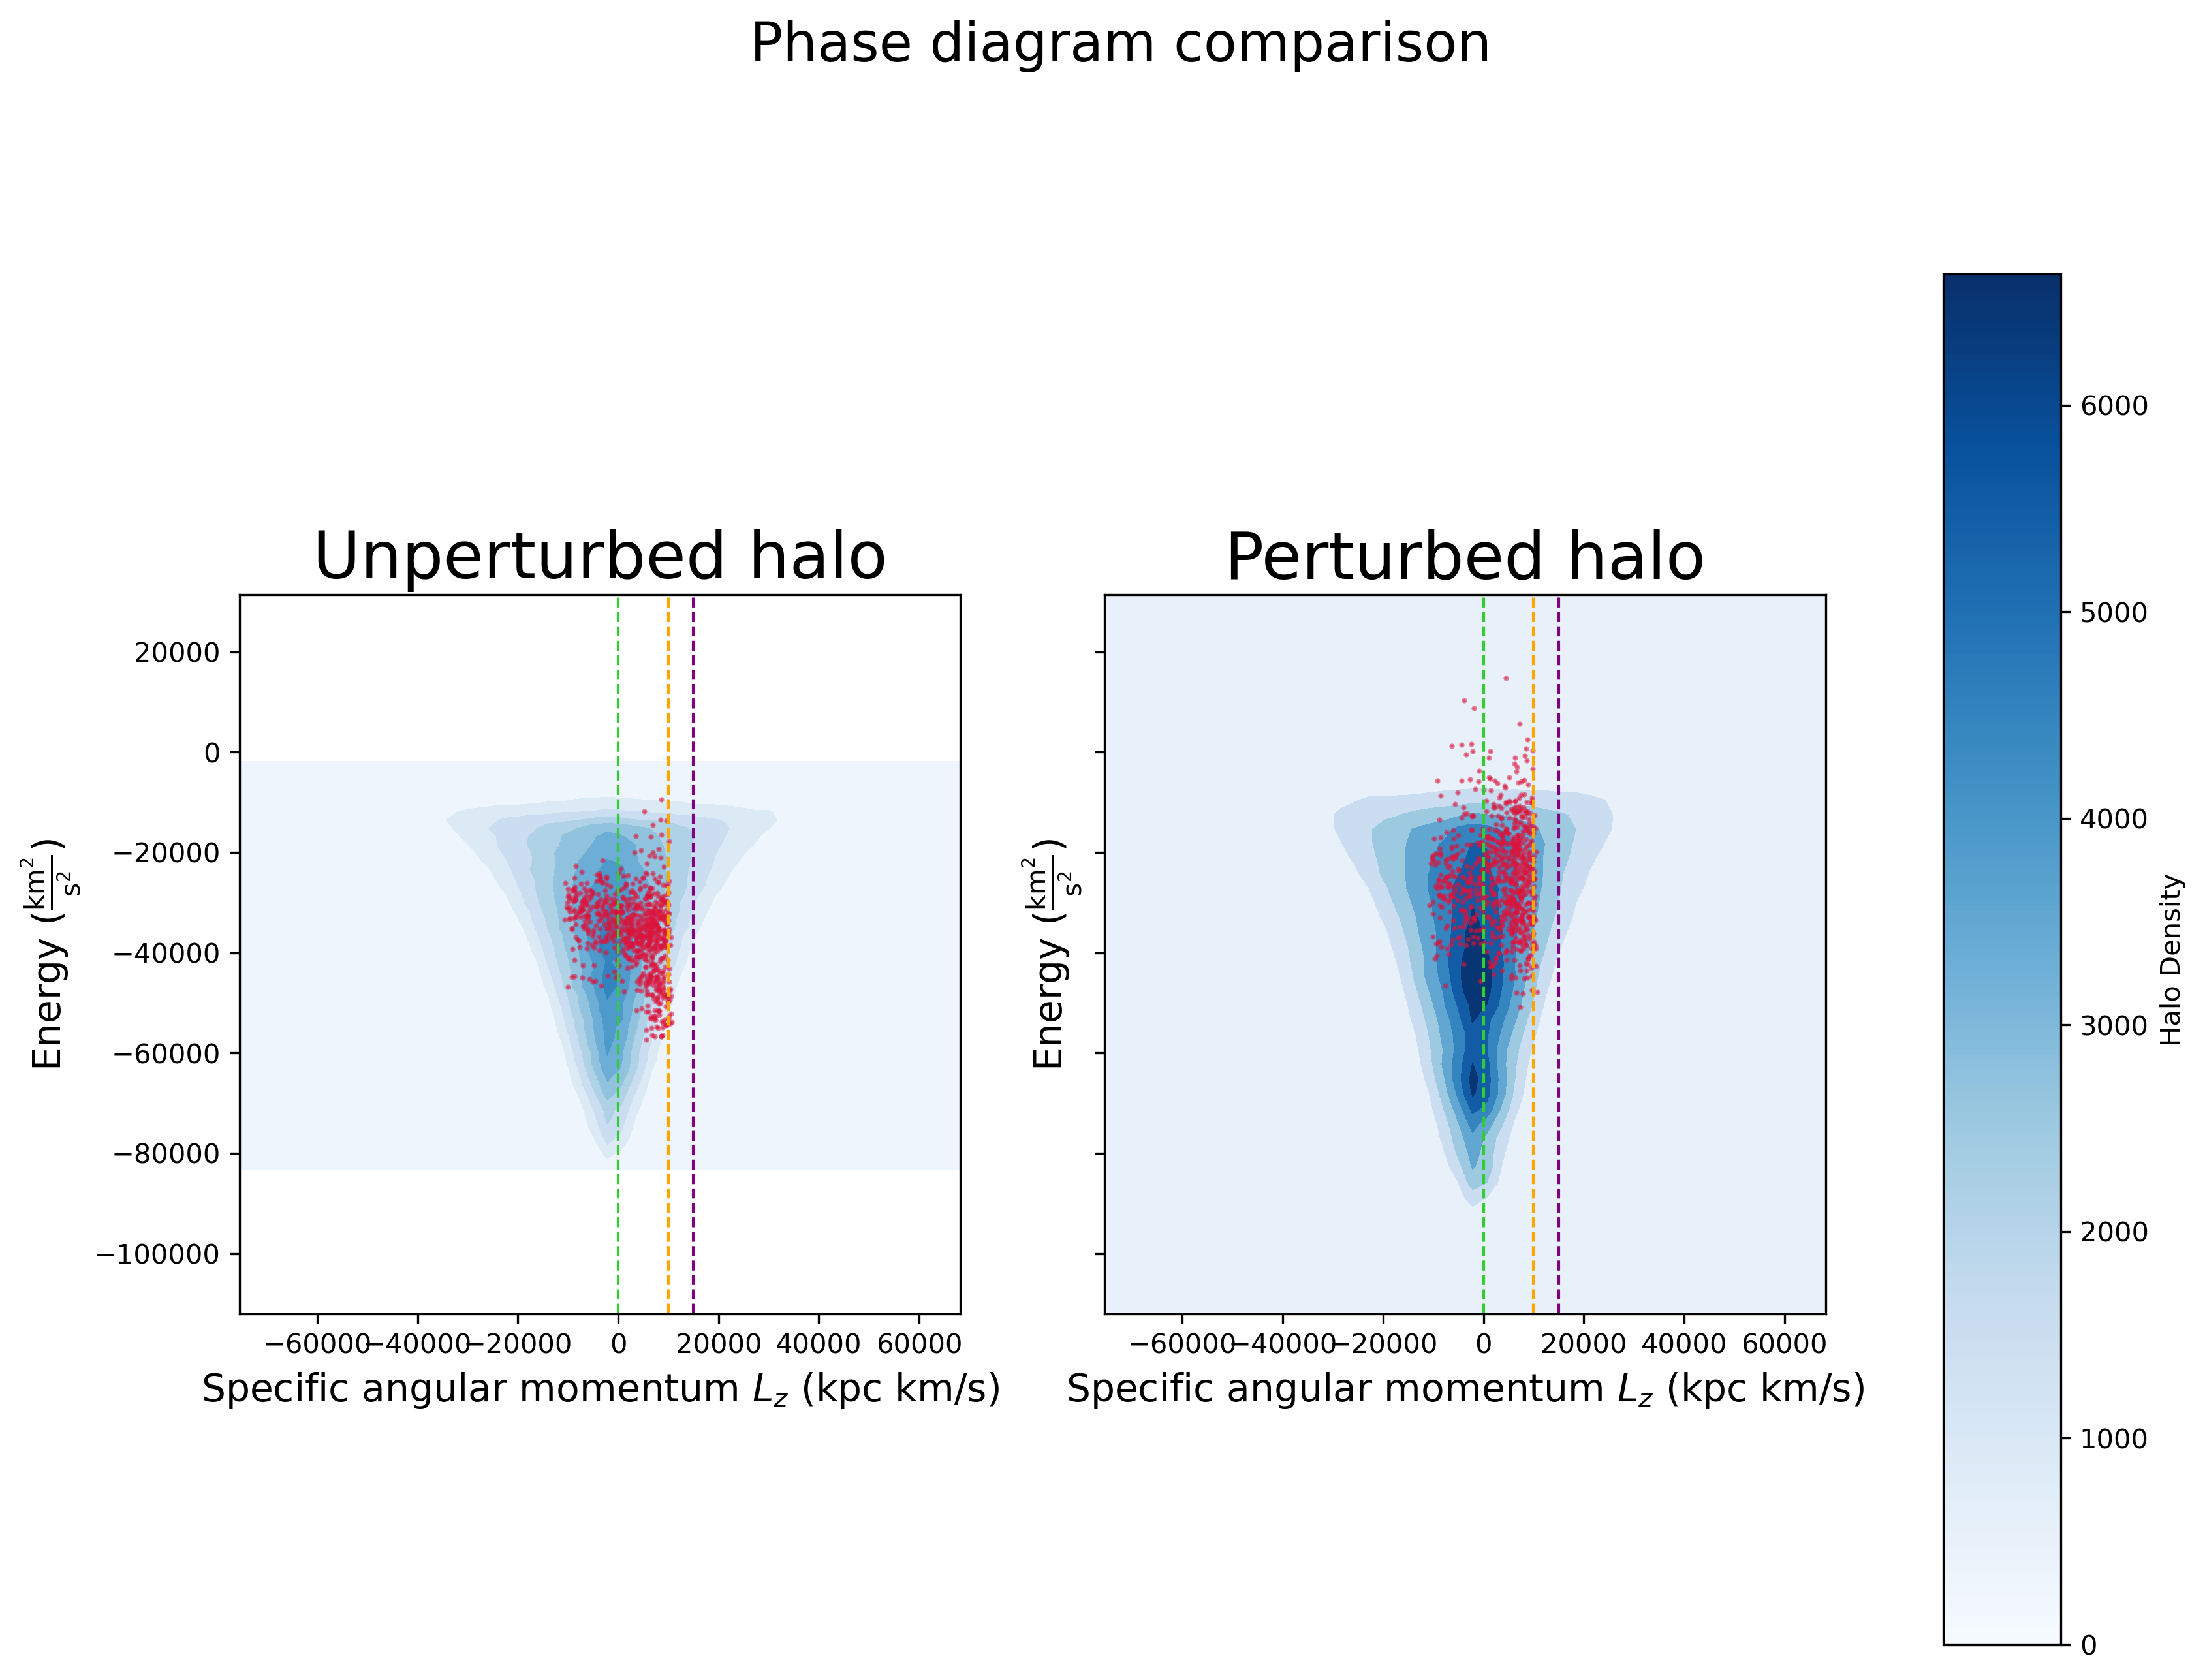

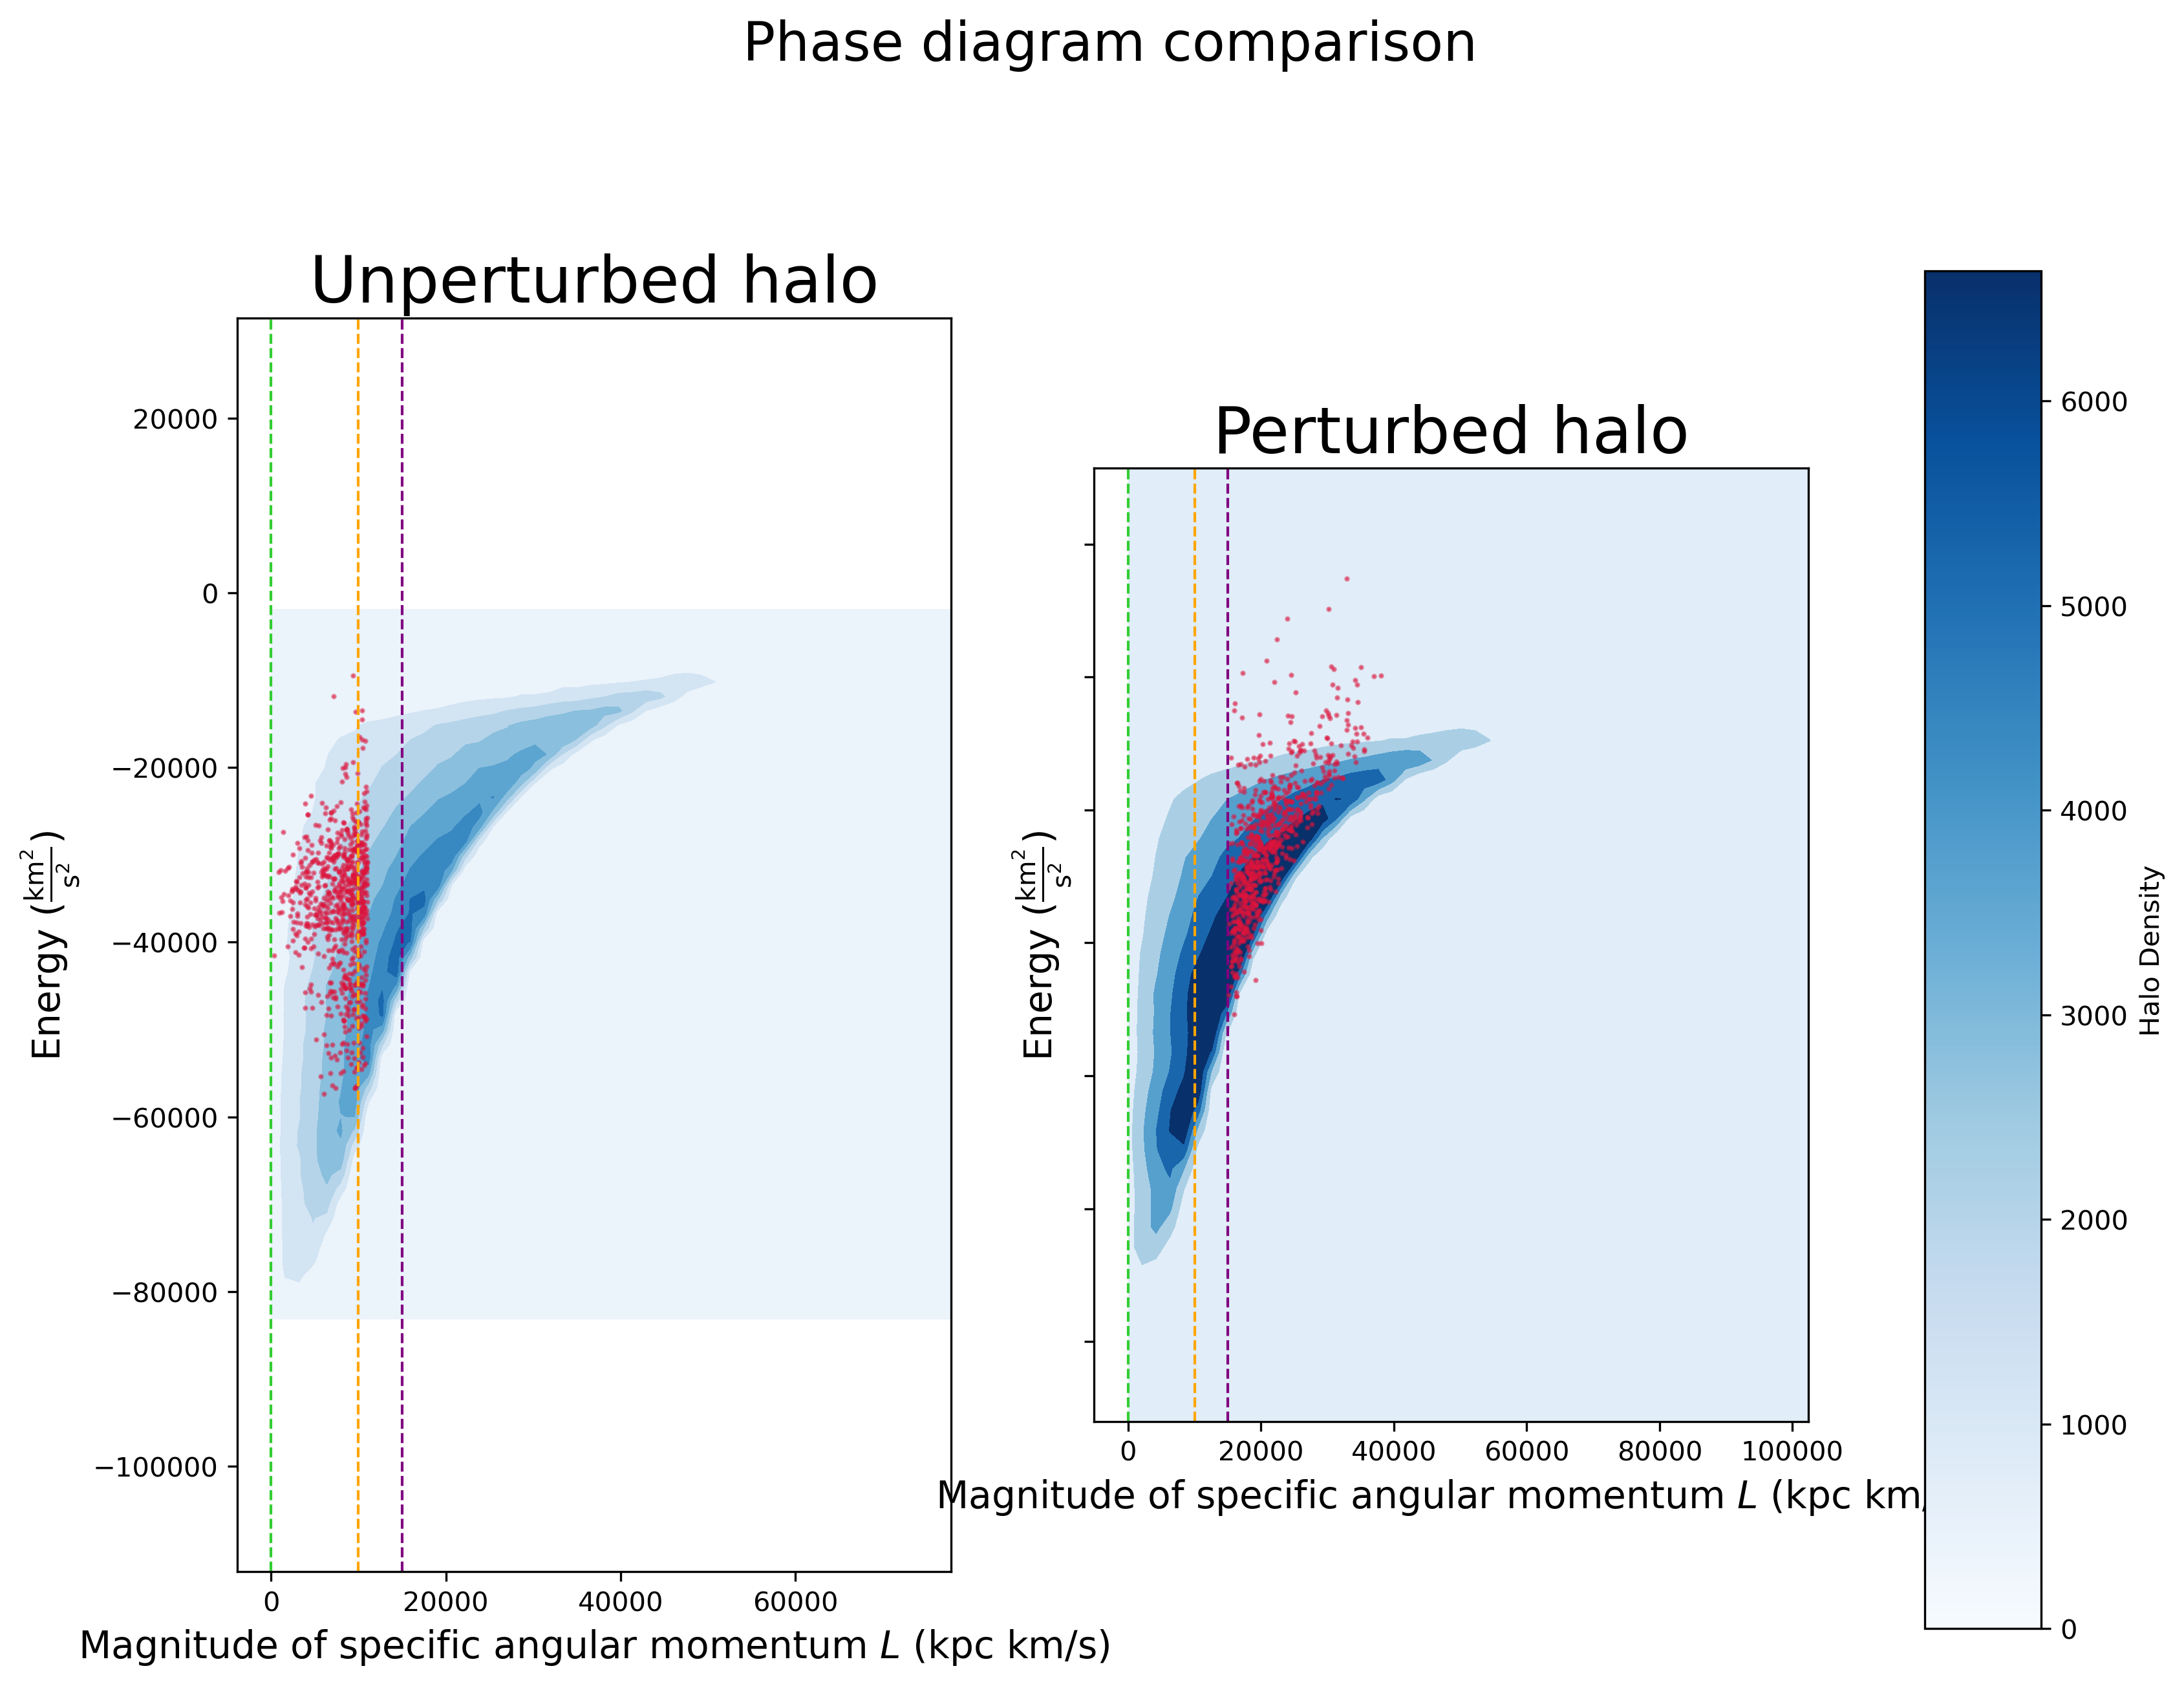

In [32]:
reload(pl)
pl.econt_scatter_side(mw, mw_lmc, wake_particles_no_pert, wake_particles_pert,'x')
pl.econt_scatter_side(mw, mw_lmc,wake_particles_no_pert, wake_particles_pert, 'y')
pl.econt_scatter_side(mw, mw_lmc, wake_particles_no_pert, wake_particles_pert,'z')
pl.econt_scatter_side(mw, mw_lmc, wake_particles_no_pert, wake_particles_pert,'mag')

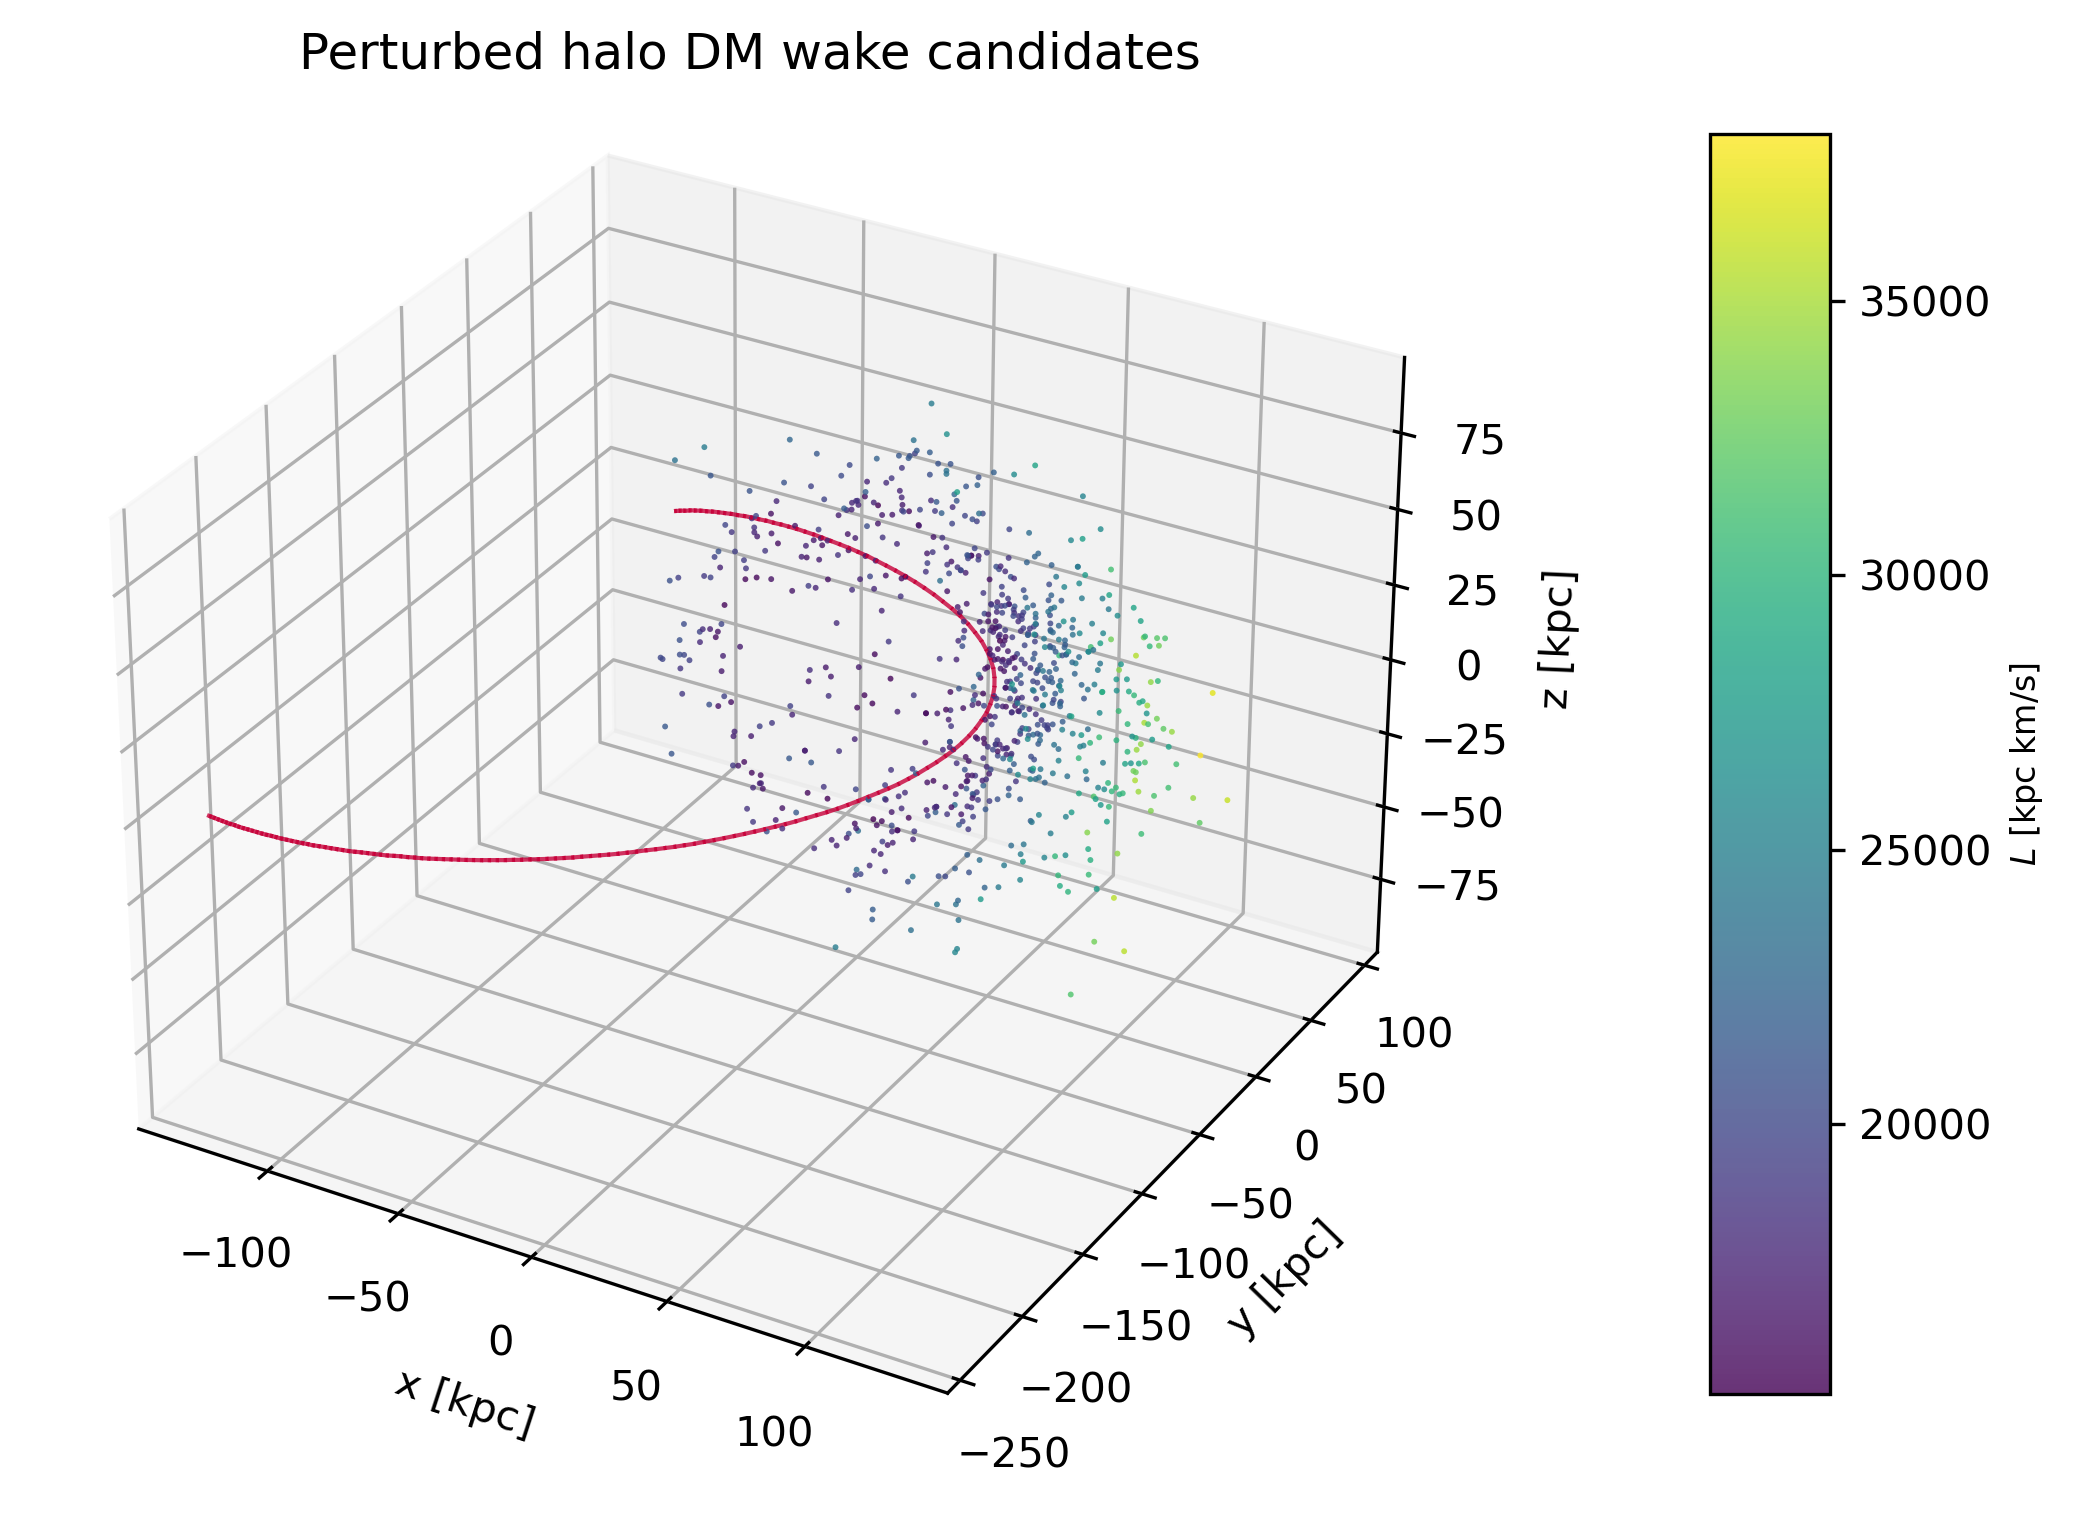

In [28]:
pl.plot_3d(wake_particles_pert, rel_lmc, 'DM wake pert part')
pl.plot_3d_plt(wake_particles_pert, rel_lmc, 'Perturbed halo DM wake candidates')


In [765]:
# pl.plot_3d(wake_particles_no_pert, rel_lmc, 'DM wake no pert part')

In [ ]:
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"xy")
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"xz")
pl.proj_both(wake_particles_no_pert, wake_particles_pert, rel_lmc,"yz")

In [ ]:
pl.proj_xy(wake_particles_pert, rel_lmc)

In [ ]:
pl.proj_xz(wake_particles_pert, rel_lmc)

In [ ]:
pl.proj_yz(wake_particles_pert, rel_lmc)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'xz',150)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'yz',150)

In [ ]:
pl.vector_field(wake_particles_pert,rel_lmc,'xy',150)


In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'xy')

In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'xz')

In [ ]:
pl.vec_field2(wake_particles_pert, wake_particles_no_pert, rel_lmc, 'yz')


In [ ]:
pl.density_contour_plt(wake_particles_no_pert,rel_lmc, 'yz')
pl.density_contour_plt(wake_particles_pert,rel_lmc, 'yz')

In [ ]:
pl.vector_field_plt(wake_particles_pert, rel_lmc, 'yz',20,2500,0.005, True)
pl.vector_field_plt(wake_particles_no_pert, rel_lmc, 'yz',10,2500,0.005, False)

In [ ]:
pl.vector_field_plt(wake_particles_pert, rel_lmc, 'yz',20,2500,0.005, True)

In [ ]:
pl.hist_orbit_plt(wake_particles_pert, rel_lmc, 'yz',8,3000,0.005, True)
pl.hist_orbit_plt(wake_particles_no_pert, rel_lmc, 'yz',8,3000,0.005, False)


In [ ]:
reload(pl)
pl.E_L(mw,  'x', 'scatter', wake_particles_no_pert)
pl.E_L(mw,  'y', 'scatter', wake_particles_no_pert)
pl.E_L(mw,  'z', 'scatter', wake_particles_no_pert)
pl.E_L(mw,  'mag', 'scatter', wake_particles_no_pert)
pl.E_L(mw_lmc,  'x', 'scatter', wake_particles_pert)
pl.E_L(mw_lmc,  'y', 'scatter', wake_particles_pert)
pl.E_L(mw_lmc,  'z', 'scatter', wake_particles_pert)
pl.E_L(mw_lmc,  'mag', 'scatter', wake_particles_pert)


In [ ]:
reload(pl)
pl.econt_side_by_side(mw, mw_lmc,'x')
pl.econt_side_by_side(mw, mw_lmc,'y')
pl.econt_side_by_side(mw, mw_lmc,'z')
pl.econt_side_by_side(mw, mw_lmc,'mag')


In [ ]:
reload(pl)
pl.E_L_contour(mw,  'x')
pl.E_L_contour(mw_lmc,  'x')
pl.E_L_contour(mw,  'y')
pl.E_L_contour(mw_lmc,  'y')
pl.E_L_contour(mw,  'z')
pl.E_L_contour(mw_lmc,  'z')


# pl.E_L_contour(wake_particles_pert,  'x', wake_particles_pert)


In [ ]:
reload(pl)
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'x')
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'y')
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'z')
pl.comparison_E_L(mw_lmc,wake_particles_pert,mw,wake_particles_no_pert, 'mag')

# Generalizacion

In [ ]:
sel2_sel3 = rc.L_delta(wake_particles_pert, wake_particles_no_pert, 200)
pl.sel3(sel2_sel3, rel_lmc, 'xz')
pl.sel3(sel2_sel3, rel_lmc, 'yz')
pl.sel3(sel2_sel3, rel_lmc, 'xy')

In [ ]:
pl.plot_3d(sel2_sel3, rel_lmc, "Seleccion 3")

In [ ]:
sel1_sel3 = rc.L_delta(mw_lmc_sel1, mw_sel1, 900)
pl.sel3(sel1_sel3, rel_lmc, 'xz')
pl.sel3(sel1_sel3, rel_lmc, 'yz')
pl.sel3(sel1_sel3, rel_lmc, 'xy')



In [ ]:
pl.plot_3d(sel1_sel3, rel_lmc, "Seleccion 3")

In [ ]:
L_mag_delta_rot = rc.L_mag_delta(mw_lmc_sel1[:,10] , mw_sel1[:,10])
L_mag_delta = np.copy(L_mag_delta_rot[:,np.newaxis])
print("the shape of L_mag_delta_rot", L_mag_delta.shape)
print("L_mag", wake_particles_pert[:,10].shape)